In [1]:
# analysis.ipynb

# Importar las funciones del archivo functions.py
from functions import *

# 1. Importar datos
filepath = "C:/Users/Carlos/Downloads/dia.csv"
df = load_data(filepath)

In [2]:
# 2. Limpieza de datos
df = remove_duplicates(df)
count_distinct_values(df)
count_null_values(df)
df = remove_unnecessary_values(df)

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


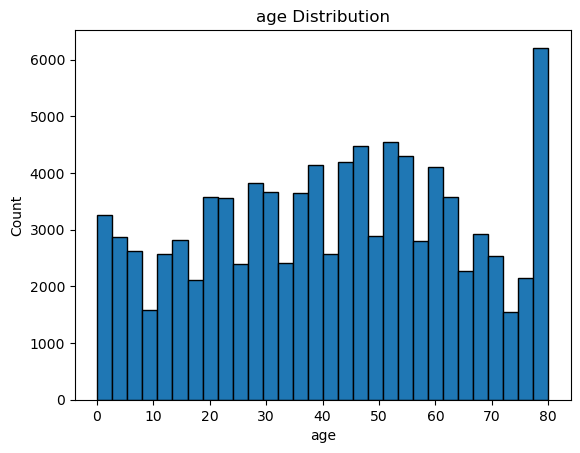

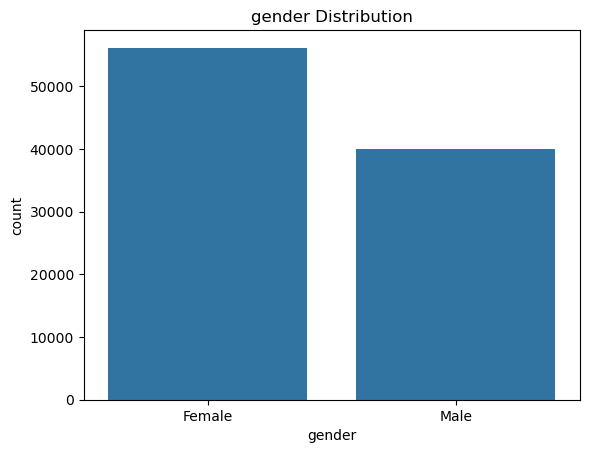

c:\Users\Carlos\Documents\GitHub\ML-Proyect\functions.py:48: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=bins)


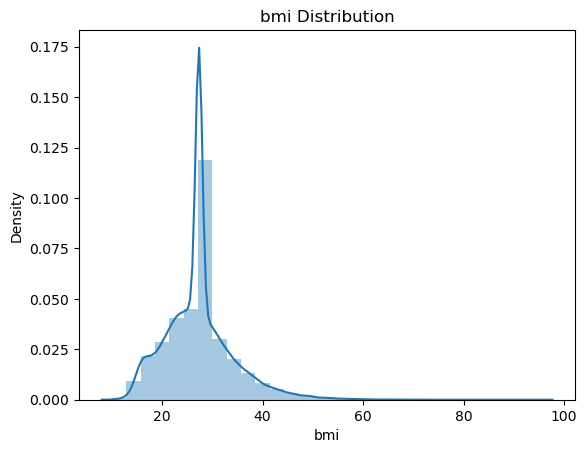

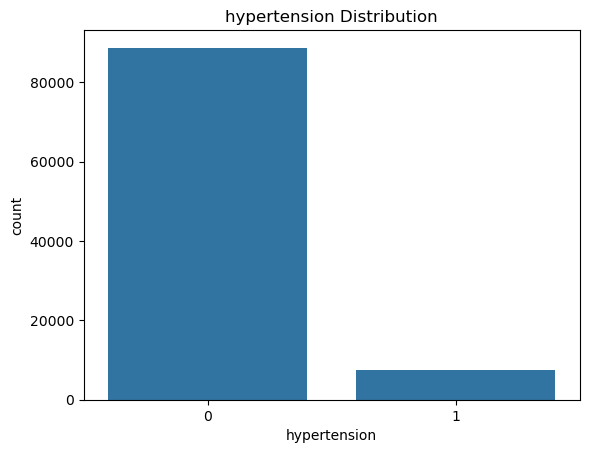

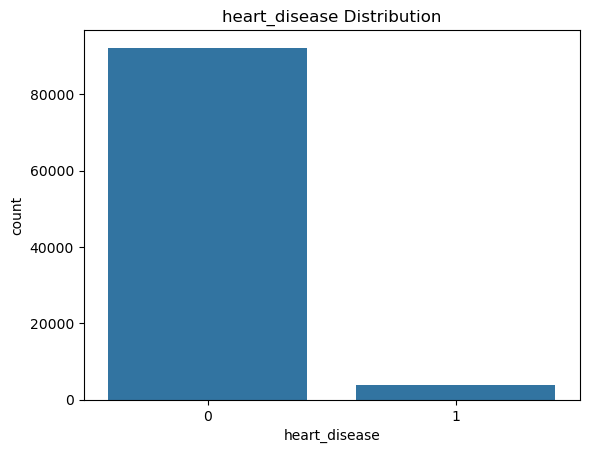

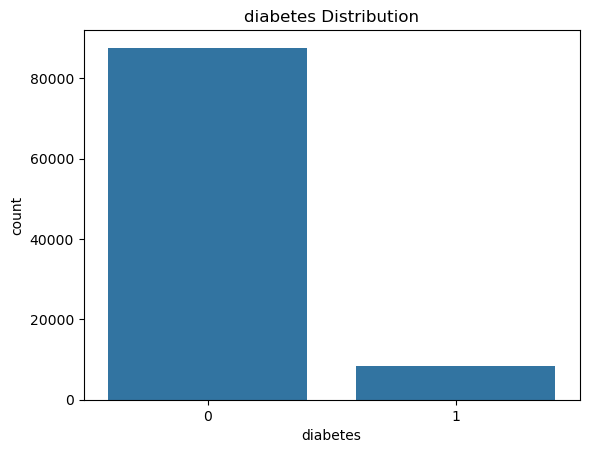

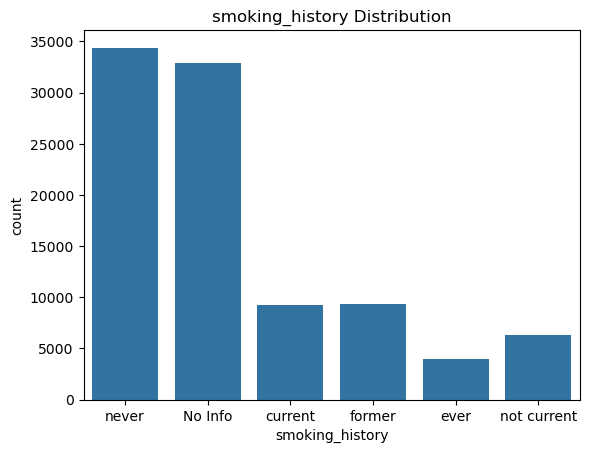

In [3]:
# 3. Análisis univariado
plot_histogram(df, 'age')
plot_countplot(df, 'gender')
plot_distplot(df, 'bmi')

for col in ['hypertension', 'heart_disease', 'diabetes']:
    plot_countplot(df, col)

plot_countplot(df, 'smoking_history')

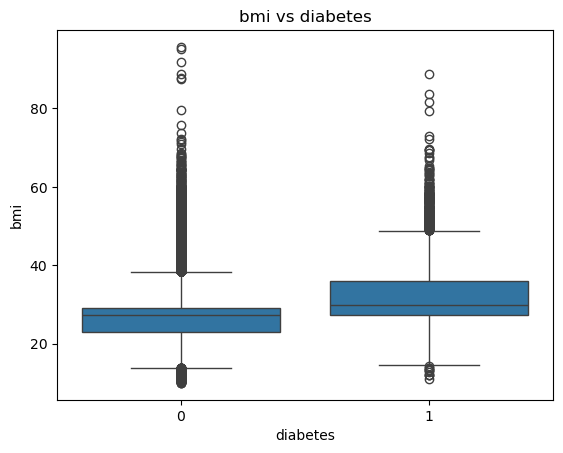

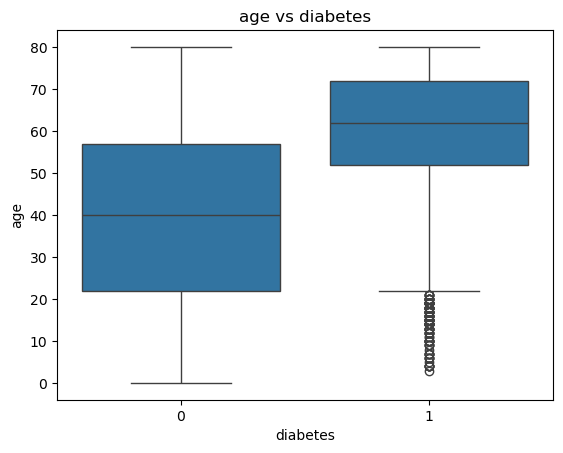

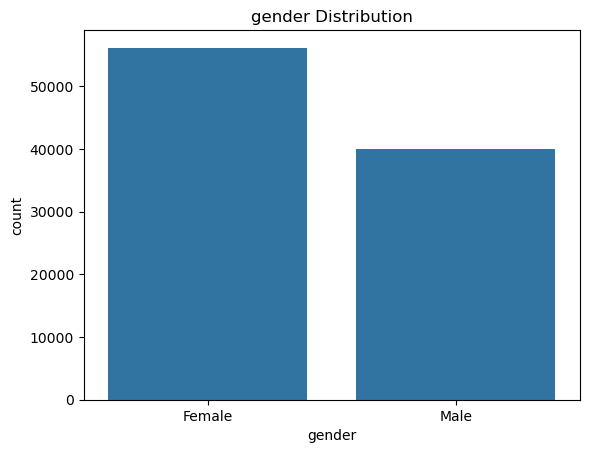

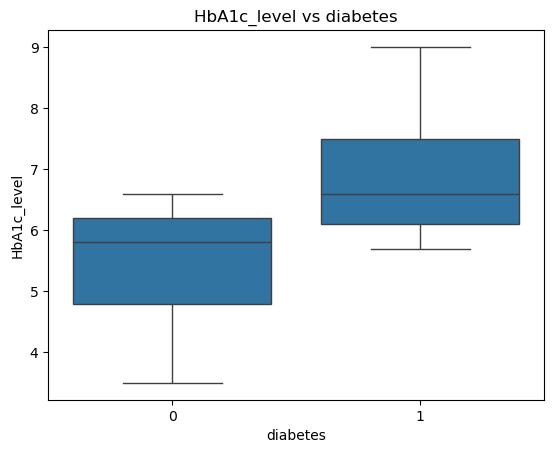

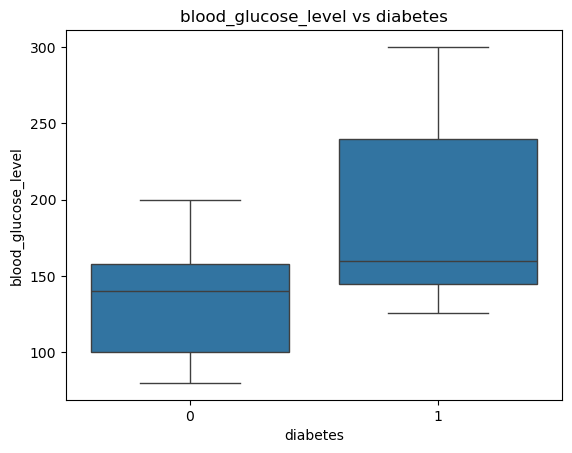

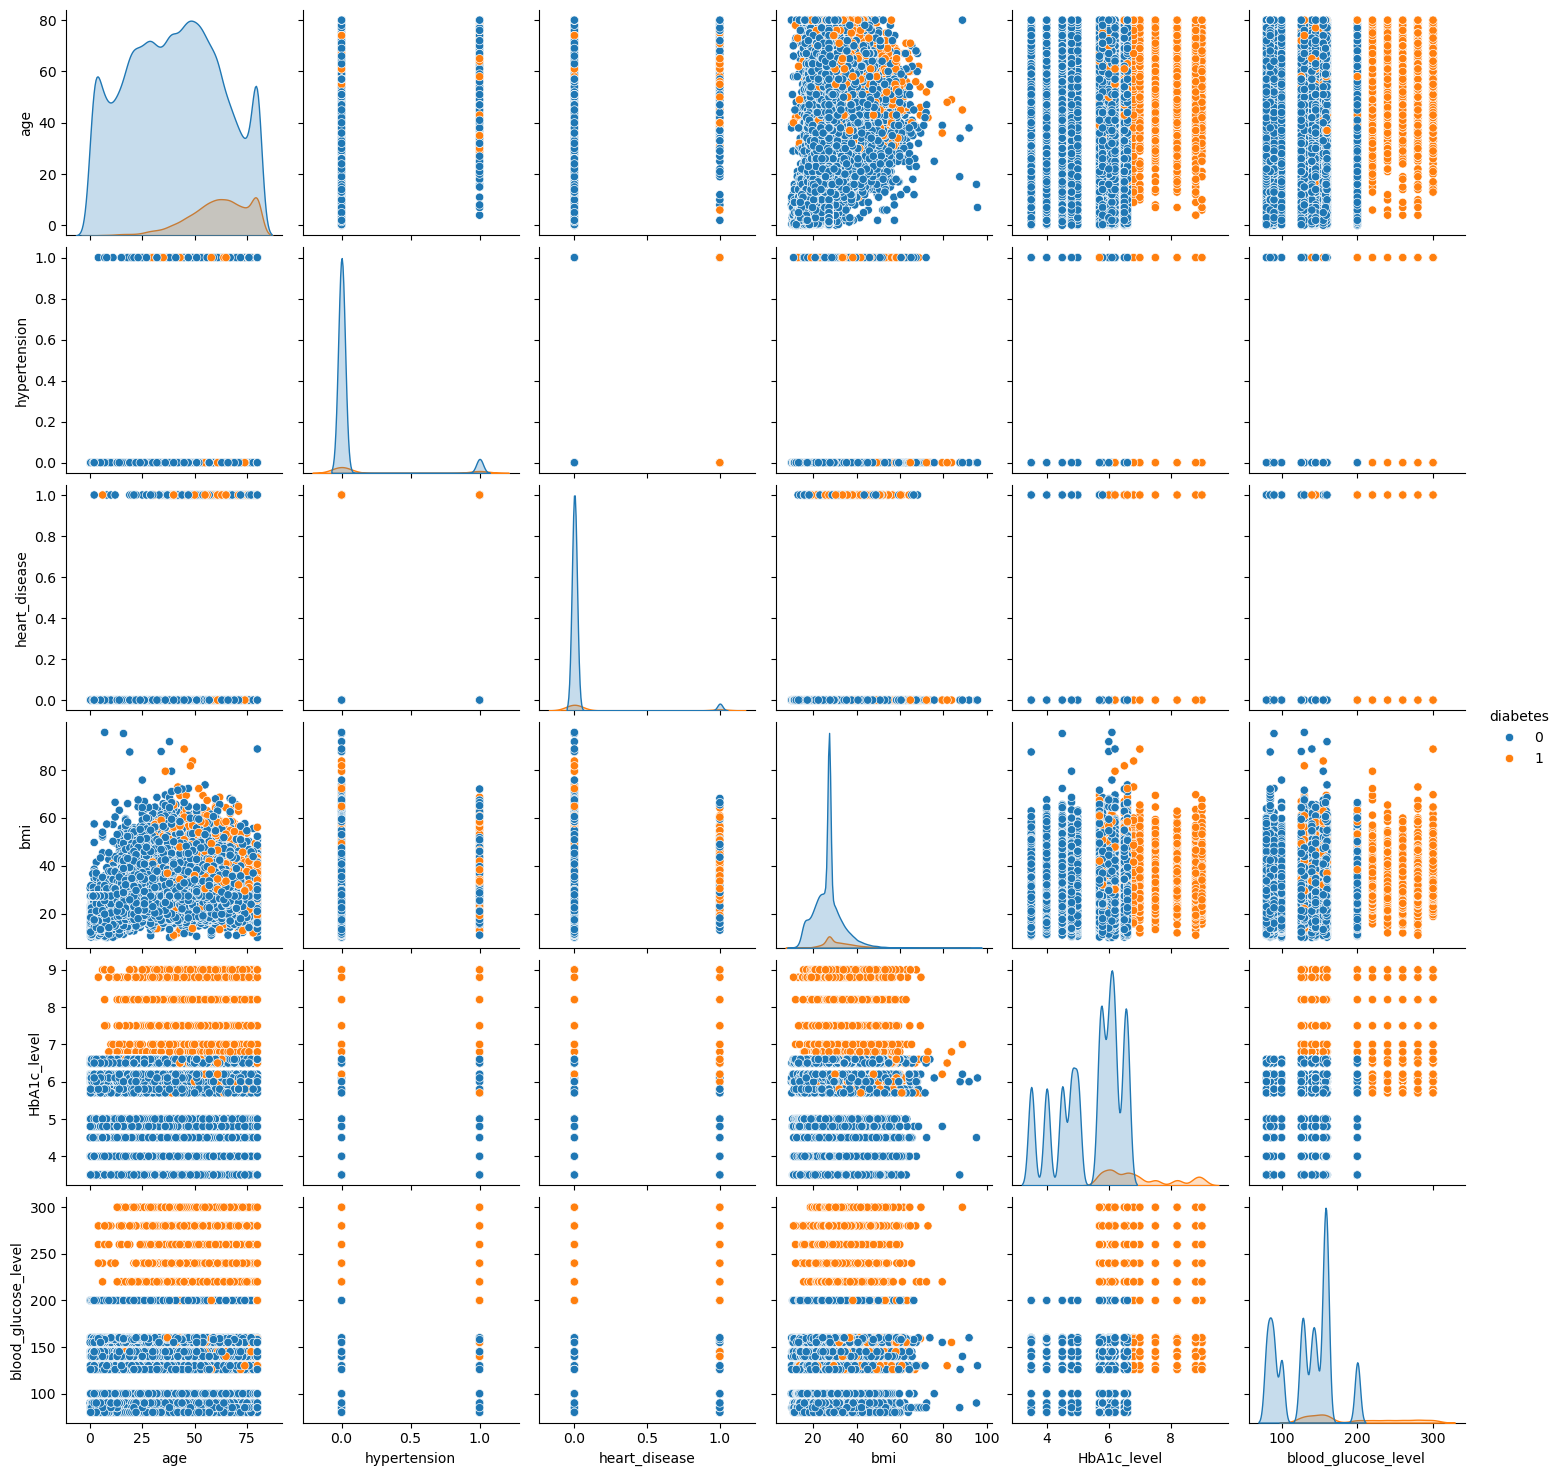

c:\Users\Carlos\anaconda3\envs\Statistics_Lab\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


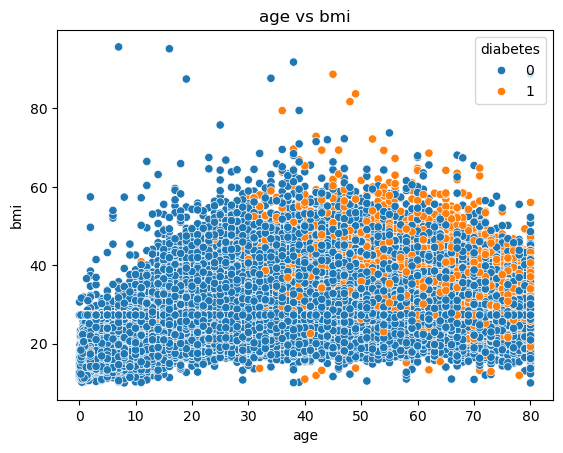

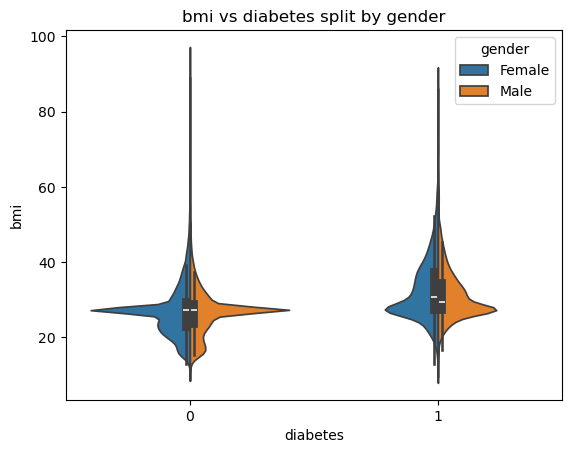

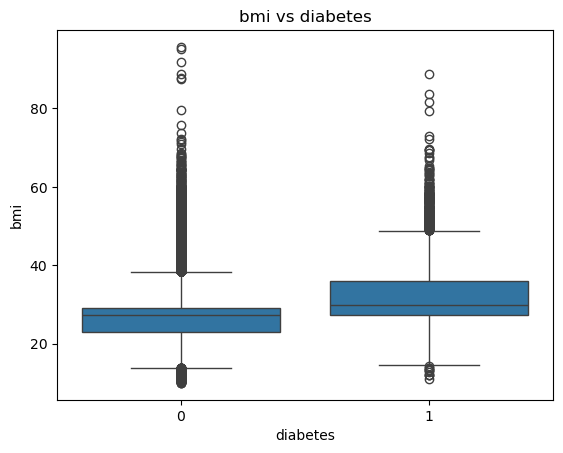

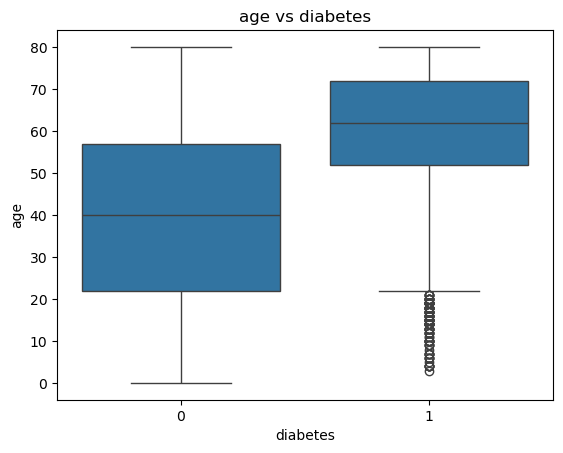

In [4]:
# 4. Análisis bivariado
plot_boxplot(df, 'diabetes', 'bmi')
plot_boxplot(df, 'diabetes', 'age')
plot_countplot(df, 'gender')
plot_boxplot(df, 'diabetes', 'HbA1c_level')
plot_boxplot(df, 'diabetes', 'blood_glucose_level')
plot_pairplot(df, 'diabetes')
plot_scatterplot(df, 'age', 'bmi', 'diabetes')
plot_violinplot(df, 'diabetes', 'bmi', 'gender')
plot_boxplot(df, 'diabetes', 'bmi')
plot_boxplot(df, 'diabetes', 'age')

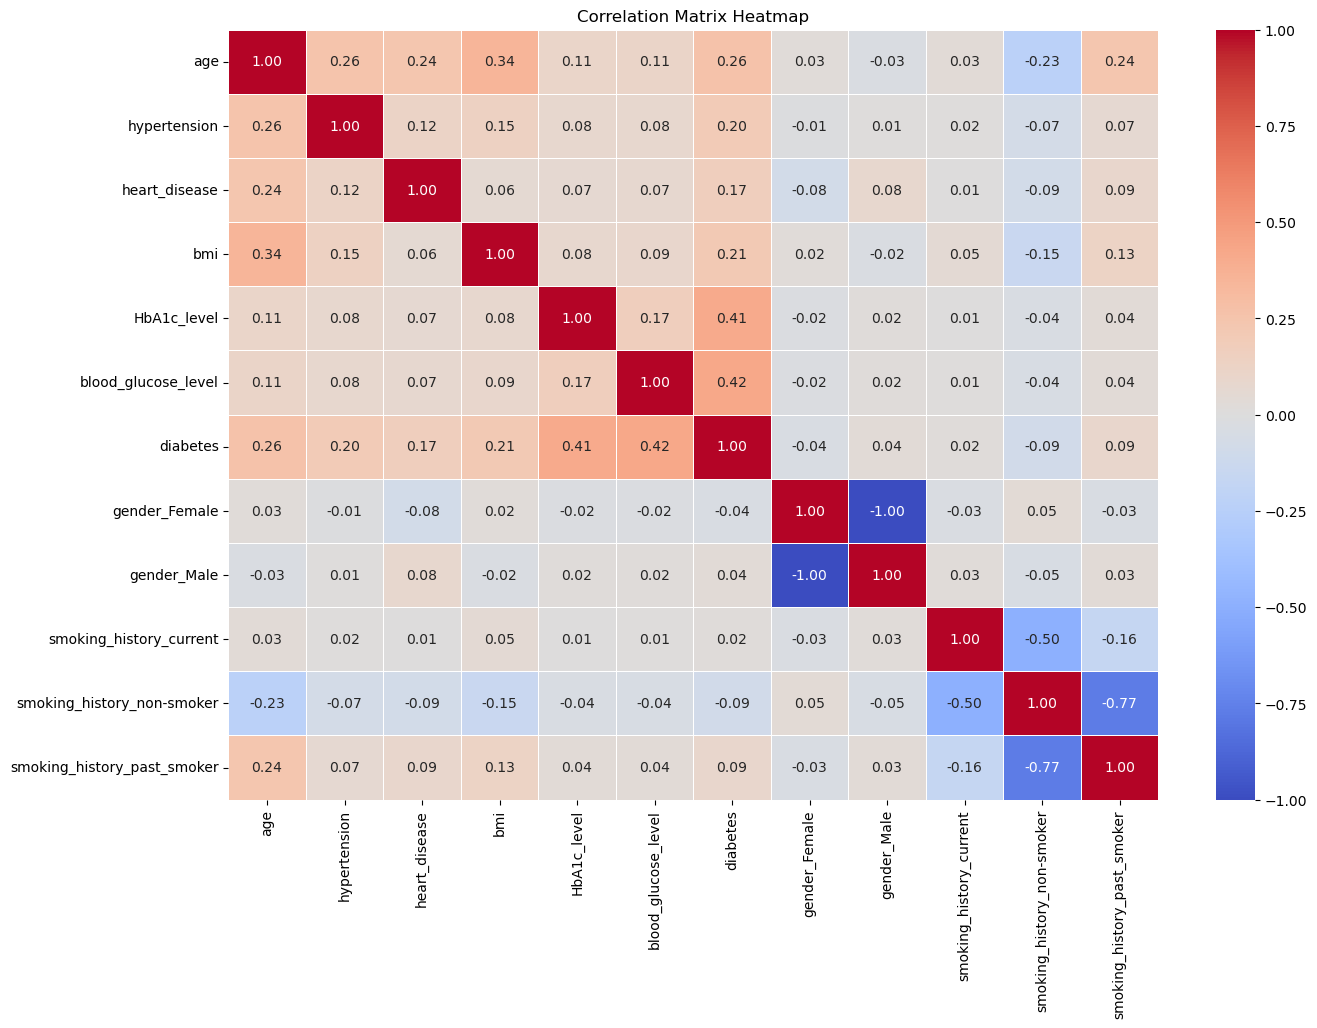

In [5]:

# 5. Correlaciones
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)
data = df.copy()
data = perform_one_hot_encoding(data, 'gender')
data = perform_one_hot_encoding(data, 'smoking_history')
correlation_matrix = data.corr()
plot_heatmap(correlation_matrix, "Correlation Matrix Heatmap")



In [7]:
# 6. Modelos de Machine Learning
# KNN
X = data.drop('diabetes', axis=1)
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = train_knn(X_train, y_train)
evaluate_model(knn, X_test, y_test)

# Cross-Validation for KNN
perform_cross_validation(KNeighborsClassifier(n_neighbors=3), X, y)

# Grid Search for KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_search_knn = perform_grid_search(KNeighborsClassifier(), param_grid_knn, X_train, y_train)
evaluate_model(grid_search_knn, X_test, y_test)

Confusion Matrix:
[[17324   201]
 [  625  1076]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17525
           1       0.84      0.63      0.72      1701

    accuracy                           0.96     19226
   macro avg       0.90      0.81      0.85     19226
weighted avg       0.95      0.96      0.95     19226

Cross-Validation Scores: [0.94985957 0.94954749 0.94980755 0.94897269 0.9516775 ]
Mean CV Score: 0.9499729600561226
Standard Deviation of CV Score: 0.0009085426646011611
Best Parameters:  {'n_neighbors': 9}
Confusion Matrix:
[[17445    80]
 [  691  1010]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17525
           1       0.93      0.59      0.72      1701

    accuracy                           0.96     19226
   macro avg       0.94      0.79      0.85     19226
weighted avg       0.96      0.96      0.96     

In [8]:
# Logistic Regression
X = df[["age", "hypertension", "heart_disease", "bmi", "HbA1c_level", "blood_glucose_level"]]
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log = train_logistic_regression(X_train, y_train)
evaluate_model(log, X_test, y_test)

# Cross-Validation for Logistic Regression
perform_cross_validation(LogisticRegression(), X, y)

# Grid Search for Logistic Regression
param_grid_log = {'C': [0.1, 1, 10, 100]}
grid_search_log = perform_grid_search(LogisticRegression(), param_grid_log, X_train, y_train)
evaluate_model(grid_search_log, X_test, y_test)

c:\Users\Carlos\anaconda3\envs\Statistics_Lab\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[17351   174]
 [  657  1044]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17525
           1       0.86      0.61      0.72      1701

    accuracy                           0.96     19226
   macro avg       0.91      0.80      0.85     19226
weighted avg       0.95      0.96      0.95     19226



c:\Users\Carlos\anaconda3\envs\Statistics_Lab\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Carlos\anaconda3\envs\Statistics_Lab\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Cross-Validation Scores: [0.96010611 0.95823364 0.95844169 0.95843953 0.9583355 ]
Mean CV Score: 0.9587112948614639
Standard Deviation of CV Score: 0.0007016284758239747


c:\Users\Carlos\anaconda3\envs\Statistics_Lab\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Carlos\anaconda3\envs\Statistics_Lab\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Best Parameters:  {'C': 100}
Confusion Matrix:
[[17353   172]
 [  656  1045]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17525
           1       0.86      0.61      0.72      1701

    accuracy                           0.96     19226
   macro avg       0.91      0.80      0.85     19226
weighted avg       0.95      0.96      0.95     19226



c:\Users\Carlos\anaconda3\envs\Statistics_Lab\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
grid_search_rf = train_random_forest(X_train, y_train, param_grid_rf)
evaluate_model(grid_search_rf, X_test, y_test)

# Cross-Validation for Random Forest
perform_cross_validation(RandomForestClassifier(), X, y)

# Importancia de características
onehot_columns = list(grid_search_rf.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))
feature_names = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns
plot_feature_importances(grid_search_rf, feature_names)